In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv
import os

In [41]:
gp_path = "G:\\My Drive\\2021\\Gaussianprocess\\"
tf_path = "G:\\My Drive\\2021\\Bias\\"

In [4]:
gp_ts = []
gp_wo_ts = []
for i in os.listdir(gp_path):
    if 'min.csv' in i:
        if 'wo_ts' in i:
            gp_wo_ts.append(gp_path+i)
        else:
            gp_ts.append(gp_path+i)
            
#gp_wo_ts
#show results
'''for i in gp_wo_ts:#gp_ts
    cur_time = i.split('.')[0].split('_')[-1][1:]
    data = pd.read_csv(i)
    print(cur_time)
    print(data.describe(include='all')[['train_best', 'rmse_val', 'test_best', 'rmse_val_test']].iloc[:5])'''
del(data)

### results from Gaussian process analysis for # of obs at different tazs (app-based data within a day)
 |content | best model(train)  | best model test | mean rmse (train) | mean rmse (test) |
 | --- | --- | --- | --- | --- | 
 |5min   | rational quadratic | linear          | 2.697             | 2.770            |
 |10min   | rbf | linear          | 1.951             | 2.387            |
 |15min   | rbf | linear          | 1.556             | 2.199            |
 |30min   | rbf | linear          | 0.912             | 1.916            |
 |60min  | rbf | linear | 0.559            | 1.750           |
 | --- | --- | --- | --- | --- | 
 |5min, ts| rational quadratic | rational quadratic | 4.058e-11             | 2.414            |
 |10min, ts| rational quadratic | rational quadratic | 5.255e-11 | 1.992            |
 |15min, ts| rational quadratic | rational quadratic | 6.478e-11 | 1.815            |
 |30min, ts| rational quadratic | rational quadratic | 7.705e-11 | 1.568            |
 |60min, ts| rational quadratic | rational quadratic | 1.333e-10           | 1.468          |

In [73]:
#preliminary results for tensor factorization
with open(tf_path+'tf_results.txt', 'r') as f:
    data = f.readlines()
f.close()

tf_result = []
for l in data:
    line = l[:-3].strip('][').split(', ')
    line = [int(line[0]), int(line[1]), int(line[2]), round(float(line[3]), 2), round(float(line[4]), 6), line[-1][1:]]
    tf_result.append(line)
del(data)

tf_result = pd.DataFrame(tf_result)
tf_result.columns = ['individual rank', 'taz rank', 'time rank', 'running time (min)', 'rmse', 'model']
tf_result['running time (min)'] = np.round(tf_result['running time (min)']/60, 2)
tf_result = tf_result[tf_result['model']=='tf']

In [74]:
tf_result.sort_values(by=['rmse'])

,individual rank,taz rank,time rank,running time (min),rmse,model
76,100,50,48,51.61,0.017581,tf
74,100,50,24,52.06,0.017619,tf
72,100,50,12,50.98,0.017647,tf
64,50,50,48,53.14,0.017833,tf
62,50,50,24,52.00,0.017857,tf
60,50,50,12,50.42,0.017878,tf
70,100,10,48,52.45,0.018056,tf
68,100,10,24,53.38,0.018082,tf
66,100,10,12,53.57,0.018112,tf
58,50,10,48,50.69,0.018159,tf


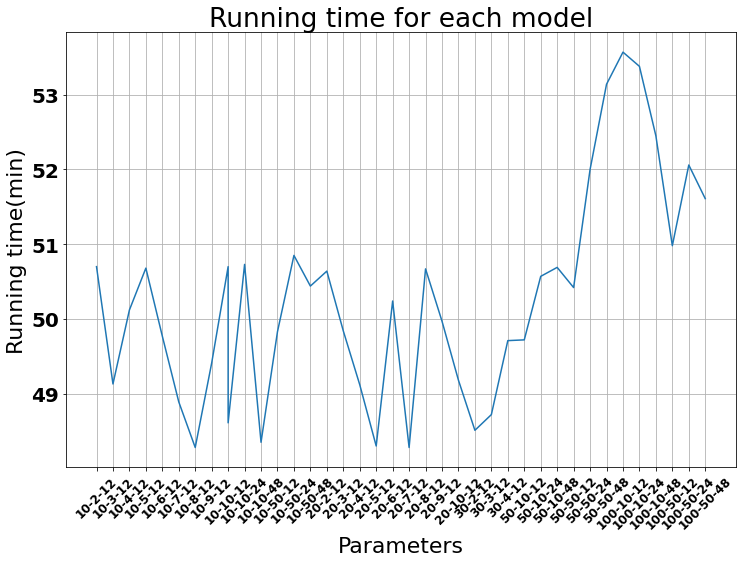

In [125]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
font = {'family' : 'normal',
        'size'   : 22}
plt.rc('font', **font)

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=20) 

plot_arr = tf_result[['individual rank', 'taz rank', 'time rank', 'running time (min)']].sort_values(by=['individual rank', 'taz rank', 'time rank']).values
y_val = plot_arr[:, -1]
x_label = []
for i in plot_arr[:, :-1]:
    x_label.append(f'{int(i[0])}-{int(i[1])}-{int(i[2])}')
    
plt.plot(x_label, y_val)
plt.xticks(rotation=45)
plt.title('Running time for each model')
plt.ylabel('Running time(min)')
plt.xlabel('Parameters')
plt.grid()
plt.show()

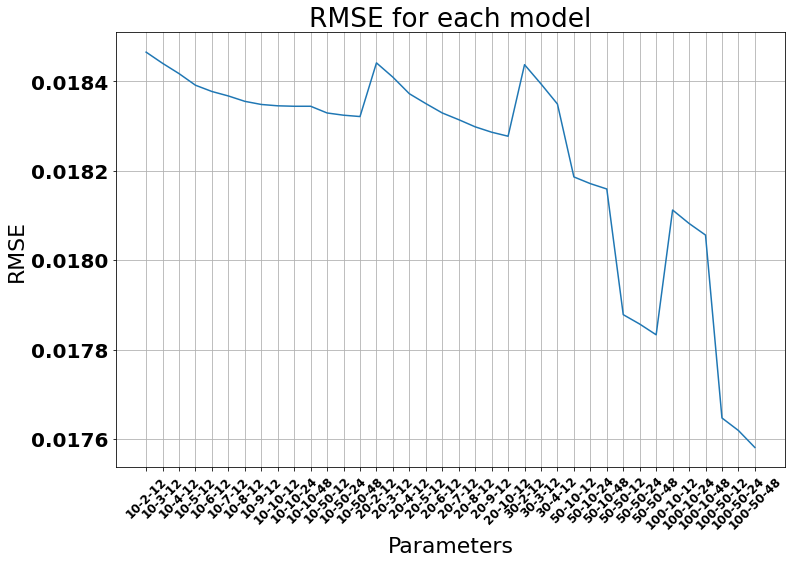

In [124]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
font = {'family' : 'normal',
        'size'   : 22}
plt.rc('font', **font)

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=20) 

plot_arr = tf_result[['individual rank', 'taz rank', 'time rank', 'rmse']].sort_values(by=['individual rank', 'taz rank', 'time rank']).values
y_val = plot_arr[:, -1]
x_label = []
for i in plot_arr[:, :-1]:
    x_label.append(f'{int(i[0])}-{int(i[1])}-{int(i[2])}')
    
plt.plot(x_label, y_val)
plt.xticks(rotation=45)
plt.title('RMSE for each model')
plt.ylabel('RMSE')
plt.xlabel('Parameters')
plt.grid()
plt.show()